# **Problem statement:**

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Approach:**

* We are provided with two datasets, one contains all the details of the app, and another one contains the user reviews of the respective app. By analysing these two datasets, we must come up with the key factors that are responsible for app engagement and success.
* First we need to explore the type of data present in the dataset and define the contents and the datatype in each column.
* Once we define the the contents in each column, we can identify and handle all the NaN and error values present in the dataset. We can also inspect the datatypes of the values in each column and convert it to an appropriate datatype.
* Now we can analyse the data pipeline and come up with different visualizations.
* From the visualizations we can come up with insights and the factors responsible for the success of an app.

# **Dataset Links :**
Play Store Dataset :- https://drive.google.com/file/d/11MmwCPUbJnKe2BkDdBG286ITSS2Eun5C/view?usp=sharing

User Reviews Dataset :- https://drive.google.com/file/d/1OqUKjxQTWX7V_Qgs-qfzCfFq62grgLX4/view?usp=sharing

# **Exploring Play store data:**

In [92]:
# Importing the required libraries to read the csv files

import pandas as pd
import numpy as np

In [93]:
csv_file_path = 'Play Store Data.csv'
ps_df = pd.read_csv(csv_file_path)

In [94]:
# Basic Inspection
# Viewing the top 10 rows of the imported dataframe

ps_df.head(10)

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating   
0     159   19M      10,000+  Free     0       Everyone  \
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver   
0               Art & Design     January 7, 2018               1.0.0  \
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

In [95]:
# Viewing the bottom 10 rows of the dataframe

ps_df.tail(10)

App             Category   
10831                       payermonstationnement.fr  MAPS_AND_NAVIGATION  \
10832                                       FR Tides              WEATHER   
10833                                    Chemin (fr)  BOOKS_AND_REFERENCE   
10834                                  FR Calculator               FAMILY   
10835                                       FR Forms             BUSINESS   
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price   
10831     NaN      38                9.8M       5,000+  Free     0  \
10832     3.8    1195                582k     100,000+  Free     0   
10833     4.8      44                619k       1,000+  Free     0   
10834     4.0       7                2.6M         500+  Free     0   
10835     NaN       0                9.6M          10+  Free     0   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres        Last Updated   
10831       Everyone  Maps & Navigation       June 13, 2018  \
10832       Everyone            Weather   February 16, 2014   
10833       Everyone  Books & Reference      March 23, 2014   
10834       Everyone          Education       June 18, 2017   
10835       Everyone           Business  September 29, 2016   
10836       Everyone          Education       July 25, 2017   
10837       Everyone          Education        July 6, 2018   
10838       Everyone            Medical    January 20, 2017   
10839     Mature 17+  Books & Reference    January 19, 2015   
10840       Everyone          Lifestyle       July 25, 2018   

              Current Ver         Android Ver  
10831           2.0.148.0          4.0 and up  
10832                 6.0          2.1 and up  
10833                 0.8          2.2 and up  
10834               1.0.0          4.1 and up  
10835               1.1.5          4.0 and up  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device

In [96]:
# Finding the number of rows and columns in the given dataset

ps_df.shape

(10841, 13)


Hence, we can say that there are a total of 10841 rows and 13 columns in this .csv file. Let us explore the columns, and the significance of the data it possesses.

In [97]:
# Columns of this dataset are

ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Let us first define what information the columns contain based on our inspection.**

* `App`: Contains the name of the app with a short description (optional).
* `Category`: It gives the category to the app.
* `Rating`: It contains the average rating the respective app received from its users.
* `Reviews`: It contains the number of users that have dropped a review for the respective app.
* `Size`: It contains the the disk space required to install the respective app.
* `Installs`: It gives the rounded figure of number of times the respective app was downloaded.
* `Type`: It states whether an app is free to use or paid.
* `Price`: It gives the price payable to install the app. For free type apps, the price is zero.
* `Content rating`: It states whether or not an app is suitable for all age groups or not.
* `Genres`: It gives the genre(s) to which the respective app belongs.
* `Last updated`: It gives the day in which the latest update was released.
* `Current Ver`: It gives the current version of the respective app.
* `Android Ver`: It gives the android version of the respective app.

# **Handling the NaN values in the Play store data:**

In [98]:
# First of all lets find the number of NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Let us try to handle these NaN values one column at a time.

Lets find the percentage of of rows that contain atleast one NaN value.

In [99]:
# Percentage of rows containing atleast one NaN value

total_nan = sum([True for id,row in ps_df.iterrows() if any(row.isnull())])

perc_nan = round(total_nan/10841*100, 2)

print(f'Hence, there are a total of {total_nan}({perc_nan}%) rows which contain atleast one NaN value.')

Hence, there are a total of 1481(13.66%) rows which contain atleast one NaN value.


Since approximately 13.66% of all the rows in the dataset contains atleast one NaN value, it is not practcal to eliminate all the rows containing NaN values. We need to handle this problem in another way.

Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.

**1. `Android Ver`: There are a total of 3 NaN values in this column.**

In [100]:
# The rows containing NaN values in the Android Ver column

ps_df[ps_df['Android Ver'].isnull()]

App         Category  Rating   
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4  \
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews    Size Installs  Type     Price Content Rating   
4453      230     11M   1,000+  Paid     $1.49       Everyone  \
4490      189    2.1M  10,000+  Free         0       Everyone   
10472    3.0M  1,000+     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

* There are total of three entries with NaN in the `Android Ver` column.
* There are a lot of errors the row corresponding to index number 10472. For example, the `Category` contains the value '1.9', which does not make any sense, the `Rating` is '19' which cannot be true, since the play store app reviews can be in between 1 and 5 only, and so on. So it is of our best interest to delete this row altogather so as to eliminate any errors as we proceed with the analysis.

In [101]:
# Finding the different values the 'Android Ver' column takes

ps_df['Android Ver'].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

Since the NaN values in the `Android Ver` column cannot be replaced by any particular value, and, since there are only 3 rows which contain NaN values in this column, which accounts to less than 0.03% of the total rows in the given dataset, it can be be dropped.

In [102]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.

ps_df = ps_df[ps_df['Android Ver'].notna()]


In [103]:
# Shape of the updated dataframe

ps_df.shape

(10838, 13)

In [104]:
# NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

We were successfully able to handle the NaN values in the `Android Ver` column.

**2. `Current Ver`: There are a total of 8 NaN values in this column.**

In [105]:
# The rows containing NaN values in the Current Ver column

ps_df[ps_df['Current Ver'].isnull()]

App             Category  Rating Reviews   
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2      55  \
1553              Market Update Helper   LIBRARIES_AND_DEMO     4.1   20145   
6322            Virtual DJ Sound Mixer                TOOLS     4.2    4010   
6803                         BT Master               FAMILY     NaN       0   
7333                       Dots puzzle               FAMILY     4.0     179   
7407                   Calculate My IQ               FAMILY     NaN      44   
7730                            UFO-CQ                TOOLS     NaN       1   
10342                   La Fe de Jesus  BOOKS_AND_REFERENCE     NaN       8   

       Size    Installs  Type  Price Content Rating             Genres   
15     2.7M      5,000+  Free      0       Everyone       Art & Design  \
1553    11k  1,000,000+  Free      0       Everyone   Libraries & Demo   
6322   8.7M    500,000+  Free      0       Everyone              Tools   
6803   222k        100+  Free      0       Everyone          Education   
7333    14M     50,000+  Paid  $0.99       Everyone             Puzzle   
7407   7.2M     10,000+  Free      0       Everyone      Entertainment   
7730   237k         10+  Paid  $0.99       Everyone              Tools   
10342  658k      1,000+  Free      0       Everyone  Books & Reference   

            Last Updated Current Ver Android Ver  
15          June 6, 2018         NaN  4.2 and up  
1553   February 12, 2013         NaN  1.5 and up  
6322        May 10, 2017         NaN  4.0 and up  
6803    November 6, 2016         NaN  1.6 and up  
7333      April 18, 2018         NaN  4.0 and up  
7407       April 3, 2017         NaN  2.3 and up  
7730        July 4, 2016         NaN  2.0 and up  
10342   January 31, 2017         NaN  3.0 and up

In [106]:
# Finding the different values the 'Current Ver' column takes

ps_df['Current Ver'].value_counts()

Current Ver
Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the `Current Ver` column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [107]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.

ps_df = ps_df[ps_df['Current Ver'].notna()]

In [108]:
# NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [109]:
# Shape of the updated dataframe

ps_df.shape

(10830, 13)

We were successfully able to handle the NaN values in the `Current Ver` column.

**3. `Type`: There is only one NaN value in this column.**

In [110]:
# The row containing NaN values in the Type column

ps_df[ps_df['Type'].isnull()]

App Category  Rating Reviews                Size   
9148  Command & Conquer: Rivals   FAMILY     NaN       0  Varies with device  \

     Installs Type Price Content Rating    Genres   Last Updated   
9148        0  NaN     0   Everyone 10+  Strategy  June 28, 2018  \

             Current Ver         Android Ver  
9148  Varies with device  Varies with device

In [111]:
# Finding the different values the 'Type' column takes

ps_df['Type'].value_counts()

Type
Free    10032
Paid      797
Name: count, dtype: int64

The `Type` column contains only two entries, namely, `Free` and `Paid`. Also, if the app is of type-`paid`, the price of that app will be printed in the corresponding `Price` column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-`free`. Hence we can replace this NaN value with `Free`.

In [112]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'

ps_df.loc[9148,'Type'] = 'Free'

In [113]:
# Finding the different values the 'Type' column takes

ps_df['Type'].value_counts()

Type
Free    10033
Paid      797
Name: count, dtype: int64

In [114]:
# NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [115]:
# Shape of the updated dataframe

ps_df.shape

(10830, 13)

We were successfully able to handle the NaN values in the 'Type' column.

**4. `Rating`: This column contains 1470 NaN values.**

In [116]:
# The rows containing NaN values in the Rating column

ps_df[ps_df['Rating'].isnull()]

App             Category  Rating   
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN  \
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating   
23         61  7.0M  100,000+  Free     0       Everyone  \
113       182  5.7M  100,000+  Free     0   Everyone 10+   
123       119  3.7M   50,000+  Free     0       Everyone   
126       654  7.4M  100,000+  Free     0           Teen   
129        77  2.9M   10,000+  Free     0     Mature 17+   
...       ...   ...       ...   ...   ...            ...   
10824      67   82M   10,000+  Free     0       Everyone   
10825       7  7.7M      100+  Free     0           Teen   
10831      38  9.8M    5,000+  Free     0       Everyone   
10835       0  9.6M       10+  Free     0       Everyone   
10838       3  9.5M    1,000+  Free     0       Everyone   

                                Genres        Last Updated Current Ver   
23     Art & Design;Action & Adventure       March 7, 2018       1.0.0  \
113                             Beauty  September 20, 2017         8.0   
123                             Beauty       July 23, 2018         1.3   
126                             Beauty       July 17, 2018        1.15   
129                             Beauty      August 8, 2017         2.0   
...                                ...                 ...         ...   
10824                          Medical       July 31, 2018       2.2.2   
10825                           Social    February 2, 2018         1.0   
10831                Maps & Navigation       June 13, 2018   2.0.148.0   
10835                         Business  September 29, 2016       1.1.5   
10838                          Medical    January 20, 2017         1.0   

      Android Ver  
23     4.1 and up  
113    3.0 and up  
123    4.1 and up  
126    4.1 and up  
129    2.3 and up  
...           ...  
10824  4.4 and up  
10825  4.0 and up  
10831  4.0 and up  
10835  4.0 and up  
10838  2.2 and up  

[1470 rows x 13 columns]

Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [117]:
ps_df[(ps_df['Rating'] <1) | (ps_df['Rating']>5)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

Since there are no such errors, we can proceed further.

In [118]:
ps_df.shape

(10830, 13)

* The `Rating` column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the `Rating` column.

In [119]:
mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),1)

median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating, median_rating]

[4.2, 4.3]

In [120]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),1)

median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating, median_rating]

[4.2, 4.3]

Lets visualize this with a boxplot and a distplot.

In [121]:
# Importing the required libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Rating'>

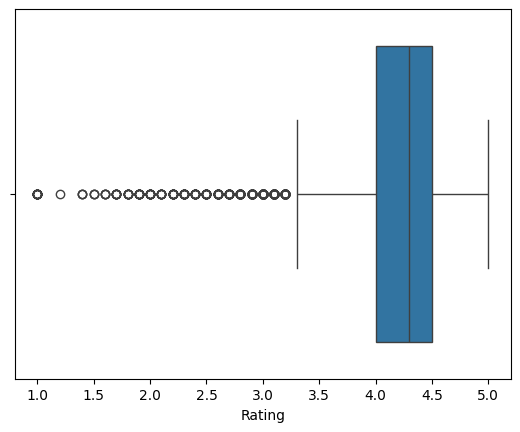

In [122]:
# Boxplot

sns.boxplot(data = ps_df, x = 'Rating')

C:\Users\shubh\AppData\Local\Temp\ipykernel_17376\2604967061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps_df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

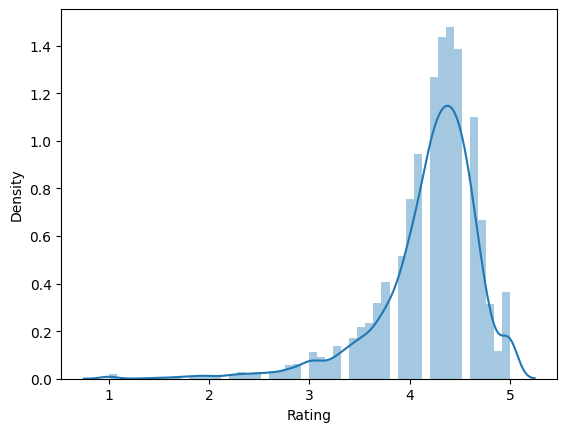

In [123]:
# Distplot

sns.distplot(ps_df['Rating'])

* The mean of the average ratings (excluding the NaN values) comes to be 4.2.
* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the distplot visualizations, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the `Rating` column with its median.

In [124]:
# Replacing the NaN values in the 'Rating' colunm with its median value

ps_df['Rating'].fillna(value=median_rating, inplace=True)

In [125]:
# NaN values in each column

ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [126]:
# Cross checking the value of median in the 'Rating' column

ps_df['Rating'].median()

4.3

In [127]:
# Shape of the updated dataframe

ps_df.shape

(10830, 13)

The resultant number of rows after imputing the NaN values in the `Rating` column come out to be 10830.

# **Handling the error values in the Play store data:**

In [128]:
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating   
0     159   19M      10,000+  Free     0       Everyone  \
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver   
0               Art & Design   January 7, 2018               1.0.0  \
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

**1. Changing the datatype of the `Last Updated` column from string to datetime.**

In [129]:
# values taken by the last updated column

ps_df['Last Updated'].value_counts()

Last Updated
August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
April 7, 2015           1
September 22, 2014      1
October 3, 2015         1
March 13, 2015          1
March 23, 2014          1
Name: count, Length: 1376, dtype: int64

In [130]:
# importing the datetime library

from datetime import datetime

In [131]:
# The datetime.strptime funtion applied to the values in the last updated column to convert datatype from string to datetime

ps_df['Last Updated'] = ps_df['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating   
0     159   19M      10,000+  Free     0       Everyone  \
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [132]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10830 non-null  object        
 1   Category        10830 non-null  object        
 2   Rating          10830 non-null  float64       
 3   Reviews         10830 non-null  object        
 4   Size            10830 non-null  object        
 5   Installs        10830 non-null  object        
 6   Type            10830 non-null  object        
 7   Price           10830 non-null  object        
 8   Content Rating  10830 non-null  object        
 9   Genres          10830 non-null  object        
 10  Last Updated    10830 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10830 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.4+ MB


We have successfully converted the values in the `Last updated` column from string datatype to datetime datatype

**2. Handling the duplicates in the `App` column**

In [133]:
ps_df['App'].value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9649, dtype: int64

In [134]:
# Inspecting the duplicates values.

ps_df[ps_df['App'] == '8 Ball Pool']

App Category  Rating   Reviews Size      Installs  Type Price   
1675  8 Ball Pool     GAME     4.5  14198297  52M  100,000,000+  Free     0  \
1703  8 Ball Pool     GAME     4.5  14198602  52M  100,000,000+  Free     0   
1755  8 Ball Pool     GAME     4.5  14200344  52M  100,000,000+  Free     0   
1844  8 Ball Pool     GAME     4.5  14200550  52M  100,000,000+  Free     0   
1871  8 Ball Pool     GAME     4.5  14201891  52M  100,000,000+  Free     0   
1970  8 Ball Pool     GAME     4.5  14201604  52M  100,000,000+  Free     0   
3953  8 Ball Pool   SPORTS     4.5  14184910  52M  100,000,000+  Free     0   

     Content Rating  Genres Last Updated Current Ver   Android Ver  
1675       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up  
1703       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up  
1755       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up  
1844       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up  
1871       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up  
1970       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up  
3953       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up

In [135]:
# Inspecting the duplicates values.

ps_df[ps_df['App'] == 'ROBLOX']

App Category  Rating  Reviews Size      Installs  Type Price   
1653  ROBLOX     GAME     4.5  4447388  67M  100,000,000+  Free     0  \
1701  ROBLOX     GAME     4.5  4447346  67M  100,000,000+  Free     0   
1748  ROBLOX     GAME     4.5  4448791  67M  100,000,000+  Free     0   
1841  ROBLOX     GAME     4.5  4449882  67M  100,000,000+  Free     0   
1870  ROBLOX     GAME     4.5  4449910  67M  100,000,000+  Free     0   
2016  ROBLOX   FAMILY     4.5  4449910  67M  100,000,000+  Free     0   
2088  ROBLOX   FAMILY     4.5  4450855  67M  100,000,000+  Free     0   
2206  ROBLOX   FAMILY     4.5  4450890  67M  100,000,000+  Free     0   
4527  ROBLOX   FAMILY     4.5  4443407  67M  100,000,000+  Free     0   

     Content Rating                        Genres Last Updated   Current Ver   
1653   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742  \
1701   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1748   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1841   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1870   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
2016   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
2088   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
2206   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
4527   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   

     Android Ver  
1653  4.1 and up  
1701  4.1 and up  
1748  4.1 and up  
1841  4.1 and up  
1870  4.1 and up  
2016  4.1 and up  
2088  4.1 and up  
2206  4.1 and up  
4527  4.1 and up

Clearly, the there are duplicate values in the `App` column. We must drop the duplicates to get more accurate data.

In [136]:
# dropping duplicates from the 'App' column.

ps_df.drop_duplicates(subset = 'App', inplace = True)

In [137]:
# Checking whether the duplicates in the 'App' column are taken care of or not.

ps_df['App'].value_counts()

App
Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: count, Length: 9649, dtype: int64

In [138]:
# Checking the shape of the updated dataset

ps_df.shape

(9649, 13)

In [139]:
# Checking whether the duplicates are taken care of from the above examples

ps_df[ps_df['App'] == 'ROBLOX']

App Category  Rating  Reviews Size      Installs  Type Price   
1653  ROBLOX     GAME     4.5  4447388  67M  100,000,000+  Free     0  \

     Content Rating                        Genres Last Updated   Current Ver   
1653   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742  \

     Android Ver  
1653  4.1 and up

In [140]:
# Checking whether the duplicates are taken care of from the above examples

ps_df[ps_df['App'] == '8 Ball Pool']

App Category  Rating   Reviews Size      Installs  Type Price   
1675  8 Ball Pool     GAME     4.5  14198297  52M  100,000,000+  Free     0  \

     Content Rating  Genres Last Updated Current Ver   Android Ver  
1675       Everyone  Sports   2018-07-31       4.0.0  4.0.3 and up

In [141]:
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating   
0     159   19M      10,000+  Free     0       Everyone  \
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

We have successfully handled all the duplicate values in the `App` column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

**3. Changing the datatype of the `Price` column from string to float.**





In [142]:
ps_df['Price'].value_counts()

Price
0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: count, Length: 92, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

In [143]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.

def drop_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

Applying the `drop_dollar` function to convert the values in the `Price` column from string datatype to float datatype.

In [144]:
# The drop_dollar funtion applied to the price column

ps_df['Price'] = ps_df['Price'].apply(lambda x: drop_dollar(x))
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type  Price Content Rating   
0     159   19M      10,000+  Free    0.0       Everyone  \
1     967   14M     500,000+  Free    0.0       Everyone   
2   87510  8.7M   5,000,000+  Free    0.0       Everyone   
3  215644   25M  50,000,000+  Free    0.0           Teen   
4     967  2.8M     100,000+  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [145]:
ps_df[ps_df['Price'] != 0].head()

App       Category  Rating   
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7  \
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

    Reviews                Size  Installs  Type  Price Content Rating   
234   11442                6.8M  100,000+  Paid   4.99       Everyone  \
235   10295                 39M  100,000+  Paid   4.99       Everyone   
427   18247  Varies with device  100,000+  Paid   3.99       Everyone   
476    1545  Varies with device   10,000+  Paid   3.99     Mature 17+   
477      57                6.2M    1,000+  Paid   6.99       Everyone   

            Genres Last Updated  Current Ver Android Ver  
234       Business   2018-03-25        1.5.2  4.0 and up  
235       Business   2017-04-11        3.4.6  3.0 and up  
427  Communication   2018-07-05  7.5.3.20547  4.1 and up  
476         Dating   2018-06-19      2.6.139  4.1 and up  
477         Dating   2017-10-25        1.1.6  4.0 and up

In [146]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.0+ MB


We have successfully converted the datatype of values in the `Price` column from string to float.

**4. Converting the values in the `Installs` column from string datatype to integer datatype.**

In [147]:
# Checking the contents of the 'Installs' column

ps_df['Installs'].value_counts()

Installs
1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: count, dtype: int64

To convert all the values in the `Installs` column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

In [148]:
# Creating a function drop_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def drop_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

Applying the `drop_plus` function to convert the values in the `Installs` column from string datatype to float datatype.

In [149]:
# The drop_plus funtion applied to the main dataframe

ps_df['Installs'] = ps_df['Installs'].apply(lambda x: drop_plus(x))
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type  Price Content Rating   
0     159   19M     10000  Free    0.0       Everyone  \
1     967   14M    500000  Free    0.0       Everyone   
2   87510  8.7M   5000000  Free    0.0       Everyone   
3  215644   25M  50000000  Free    0.0           Teen   
4     967  2.8M    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

The resultant values in the `Installs` column are of the integer datatype, and it represents the least number of times a particular app has been installed.
* `Installs` = 0 indicates that that particular app has not been installed by anyone yet.
* `Installs` = 1 indicates that the particular app has been installed by atleast one user.
* `Installs` = 1000000 indicates that the particular app has been installed by atleast one million users. So on and so forth.

In [150]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


We have successfully converted the datatype of values in the `Installs` column from string to int.

**5. Converting the values in the `Size` column to a same unit of measure(MB).**

In [151]:
ps_df['Size'].value_counts()

Size
Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: count, Length: 457, dtype: int64

We can see that the values in the `Size` column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [152]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Applying the `kb_to_mb` function to convert the values in the `Size` column to a single unit of measure (MB) and the datatype from string to float.

In [153]:
# The kb_to_mb funtion applied to the size column

ps_df['Size'] = ps_df['Size'].apply(lambda x: kb_to_mb(x))
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type  Price Content Rating   
0     159  19.0     10000  Free    0.0       Everyone  \
1     967  14.0    500000  Free    0.0       Everyone   
2   87510   8.7   5000000  Free    0.0       Everyone   
3  215644  25.0  50000000  Free    0.0           Teen   
4     967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [154]:
# Checking values in the size column of the updated dataframe

ps_df['Size'].value_counts()

Size
Varies with device    1227
12.0                   181
11.0                   181
13.0                   177
14.0                   176
                      ... 
0.7041                   1
0.4199                   1
0.4189                   1
0.1953                   1
0.6045                   1
Name: count, Length: 456, dtype: int64

A vast majority of the entries in the `Size` column contain the entry `Varies with device`. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column.

In [155]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].max()

min_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(ps_df[ps_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

Lets visualize the data in the size column using the boxplot and distplot.

<Axes: xlabel='Size'>

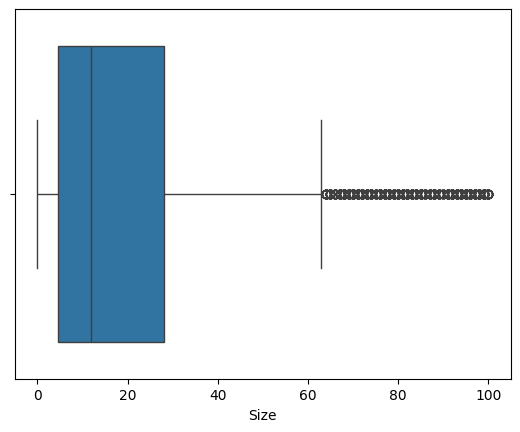

In [156]:
size_data = pd.DataFrame(ps_df[ps_df['Size'] != 'Varies with device']['Size'])
sns.boxplot(data=size_data, x='Size')

C:\Users\shubh\AppData\Local\Temp\ipykernel_17376\3468972028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps_df[ps_df['Size'] != 'Varies with device']['Size'])


<Axes: xlabel='Size', ylabel='Density'>

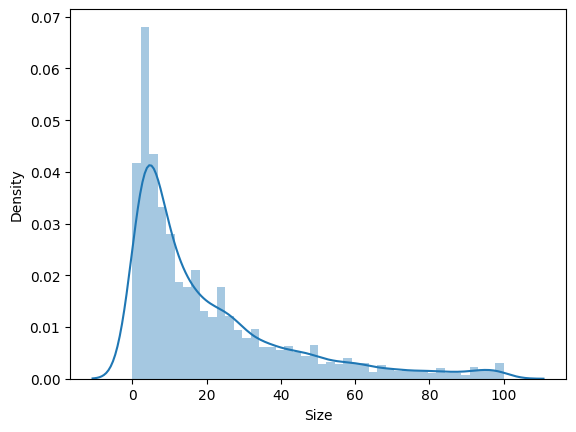

In [157]:
# Distplot

sns.distplot(ps_df[ps_df['Size'] != 'Varies with device']['Size'])

* It is clear from the visualizations that the data in the `Size` column is skewed towards the left.
* Also, we see that a vast majority of the entries in this column are of the value `Varies with device`, replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

In [158]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


We have successfully converted all the valid entries in the `Size` column to a single unit of measure (MB) and the datatype from string to float.

**6. Converting the datatype of values in the `Reviews` column from string to int.**

In [159]:
# Converting the datatype of the values in the reviews column from string to int

ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating   
0      159  19.0     10000  Free    0.0       Everyone  \
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [160]:
ps_df.describe()

Rating       Reviews      Installs        Price   
count  9649.000000  9.649000e+03  9.649000e+03  9649.000000  \
mean      4.192476  2.168145e+05  7.785404e+06     1.100079   
min       1.000000  0.000000e+00  0.000000e+00     0.000000   
25%       4.000000  2.500000e+01  1.000000e+03     0.000000   
50%       4.300000  9.690000e+02  1.000000e+05     0.000000   
75%       4.500000  2.944500e+04  1.000000e+06     0.000000   
max       5.000000  7.815831e+07  1.000000e+09   400.000000   
std       0.496528  1.832255e+06  5.378557e+07    16.860857   

                        Last Updated  
count                           9649  
mean   2017-10-31 01:35:57.612187648  
min              2010-05-21 00:00:00  
25%              2017-08-08 00:00:00  
50%              2018-05-05 00:00:00  
75%              2018-07-17 00:00:00  
max              2018-08-08 00:00:00  
std                              NaN

In [161]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int32         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(8)
memory usage: 1017.7+ KB


  We have successfully converted the datatype of the values in the `Reviews` column from string to int.

Now that we have handled the errors and NaN values in the `playstoredata.csv` file, lets do the same for the userreviews.csv file.

  # **Exploring User reviews:**

In [162]:
import pandas as pd

In [163]:
  # Reading the userreviews.csv file

user_reviews_data_path = 'User Reviews.csv'

ur_df = pd.read_csv(user_reviews_data_path)

In [164]:
# Checking the top 10 rows of the data

ur_df.head(10)

App                                  Translated_Review   
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...  \
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   
6  10 Best Foods for You                                            Amazing   
7  10 Best Foods for You                                                NaN   
8  10 Best Foods for You                               Looking forward app,   
9  10 Best Foods for You              It helpful site ! It help foods get !   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  
6  Positive                0.60                0.900000  
7       NaN                 NaN                     NaN  
8   Neutral                0.00                0.000000  
9   Neutral                0.00                0.000000

In [165]:
# Shape of the df

ur_df.shape

(64295, 5)

The dataframe contains 64295 rows of data.

In [166]:
# Columns in the df

ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [167]:
# Checking the values taken by the sentiment column

ur_df['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64

In [168]:
# Inspecting the

ur_df.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

**Let us first define what information the columns contain based on our inspection.**

* `App`: Contains the name of the app with a short description (optional).
* `Translated_Review`: It contains the English translation of the review dropped by the user of the app.
* `Sentiment`: It gives the attitude/emotion of the writer. It can be ‚ÄòPositive‚Äô, ‚ÄòNegative‚Äô, or ‚ÄòNeutral‚Äô.
* `Sentiment_Polarity`: It gives the polarity of the review. Its range is [-1,1], where 1 means ‚ÄòPositive statement‚Äô and -1 means a ‚ÄòNegative statement‚Äô.
* `Sentiment_Subjectivity`: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.








# **Handling the error and NaN values in the User reviews:**

In [169]:
# Finding the total no of NaN values in each column.

ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a lot of NaN values. We need to analyse these values and see how we can handle them.

In [170]:
# checking the NaN values in the translated review column

ur_df[ur_df['Translated_Review'].isnull()]

App Translated_Review Sentiment   
2            10 Best Foods for You               NaN       NaN  \
7            10 Best Foods for You               NaN       NaN   
15           10 Best Foods for You               NaN       NaN   
102          10 Best Foods for You               NaN       NaN   
107          10 Best Foods for You               NaN       NaN   
...                            ...               ...       ...   
64290  Houzz Interior Design Ideas               NaN       NaN   
64291  Houzz Interior Design Ideas               NaN       NaN   
64292  Houzz Interior Design Ideas               NaN       NaN   
64293  Houzz Interior Design Ideas               NaN       NaN   
64294  Houzz Interior Design Ideas               NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
2                     NaN                     NaN  
7                     NaN                     NaN  
15                    NaN                     NaN  
102                   NaN                     NaN  
107                   NaN                     NaN  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[26868 rows x 5 columns]

There are a total of 26868 rows containing NaN values in the `Translated_Review` column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` in the majority of the cases.

Lets check if there are any exceptions.

In [171]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.

ur_df[ur_df['Translated_Review'].isnull() & ur_df['Sentiment'].notna()]

App Translated_Review Sentiment   
268                                         11st               NaN   Neutral  \
15048        Birds Sounds Ringtones & Wallpapers               NaN   Neutral   
22092             Calorie Counter - MyFitnessPal               NaN   Neutral   
31623                                  DC Comics               NaN   Neutral   
52500  Garden Photo Frames - Garden Photo Editor               NaN   Neutral   

       Sentiment_Polarity  Sentiment_Subjectivity  
268                   0.0                     0.0  
15048                 0.0                     0.0  
22092                 0.0                     0.0  
31623                 0.0                     0.0  
52500                 0.0                     0.0

In the few exceptional cases where the values of remaining columns are non null for null values in the `translated_Review` column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity  of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [172]:
# Deleting the rows containing NaN values

ur_df = ur_df.dropna()

In [173]:
# The shape of the updated df

ur_df.shape

(37427, 5)

There are a total of 37427 rows in the updated df.

Hence we have taken care of all the NaN values in the df.

Lets inspect the updated df.

In [174]:
# Inspecting the sentiment column

ur_df['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

In [175]:
ur_df[ur_df['Sentiment'] == 'Negative'].head()

App                                  Translated_Review   
32  10 Best Foods for You                 No recipe book Unable recipe book.  \
43  10 Best Foods for You  Waste time It needs internet time n ask calls ...   
68  10 Best Foods for You                            Faltu plz waste ur time   
85  10 Best Foods for You                                  Crap Doesn't work   
95  10 Best Foods for You  Boring. I thought actually just texts that's i...   

   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
32  Negative              -0.500                   0.500  
43  Negative              -0.200                   0.000  
68  Negative              -0.200                   0.000  
85  Negative              -0.800                   0.800  
95  Negative              -0.325                   0.475

In [176]:
ur_df[ur_df['Sentiment'] == 'Neutral'].head()

App                      Translated_Review Sentiment   
8   10 Best Foods for You                   Looking forward app,   Neutral  \
9   10 Best Foods for You  It helpful site ! It help foods get !   Neutral   
22  10 Best Foods for You                             God health   Neutral   
25  10 Best Foods for You      I found lot wealth form health...   Neutral   
29  10 Best Foods for You                            On test....   Neutral   

    Sentiment_Polarity  Sentiment_Subjectivity  
8                  0.0                     0.0  
9                  0.0                     0.0  
22                 0.0                     0.0  
25                 0.0                     0.0  
29                 0.0                     0.0

In [177]:
ur_df.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37427.000000            37427.000000
mean             0.182171                0.492770
std              0.351318                0.259904
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

The values in the `Sentiment_Polarity` and `Sentiment_Subjectivity` looks correct.

On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals. It is easy to compare different measures using the visualizations, and thus to draw implications from them.

# **Data Visualization on play store data:**

We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

**1. Correlation Heatmap**

In [178]:
ps_df.dtypes


App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [227]:
# Finding correlation between different columns in the play store data
# ps_df.corr()

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'

In [180]:
# Correlation heatmap
# plt.figure(figsize = (10,7))
# sns.heatmap(ps_df.corr(), annot= True)

* There is a strong positive correlation between the `Reviews` and `Installs` column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The `Price` is slightly negatively correlated with the `Rating`, `Reviews`, and `Installs`. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* the `Rating` is slightly positively correlated with the `Installs` and `Reviews` column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

**2. Percentage of free apps and paid in the database**

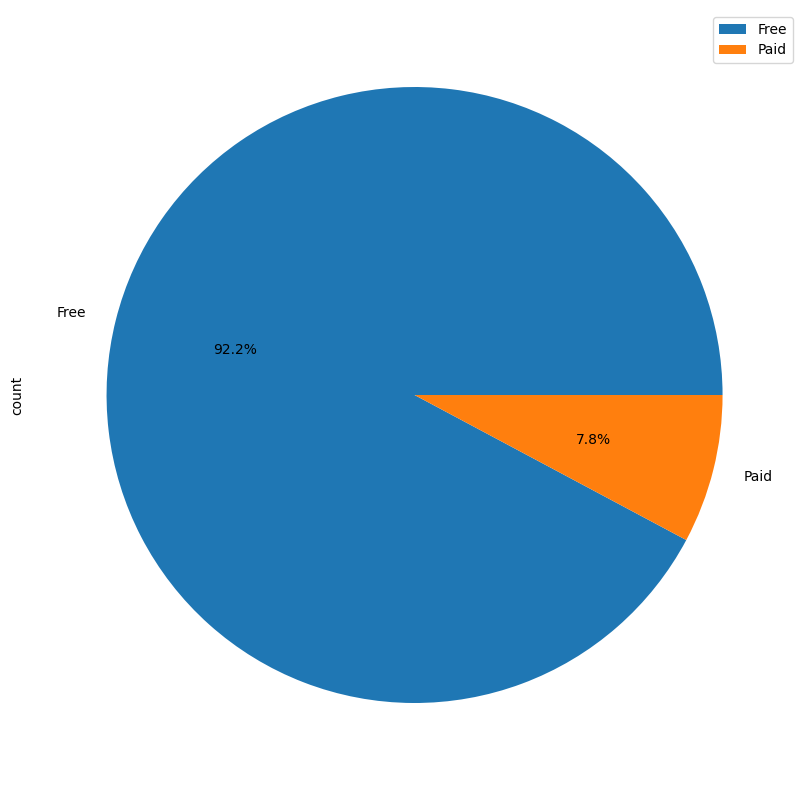

In [181]:
# Pie chart defining the type of the app

ps_df['Type'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

The majority of the apps in theplay store are of Free type.

**3. Content rating**

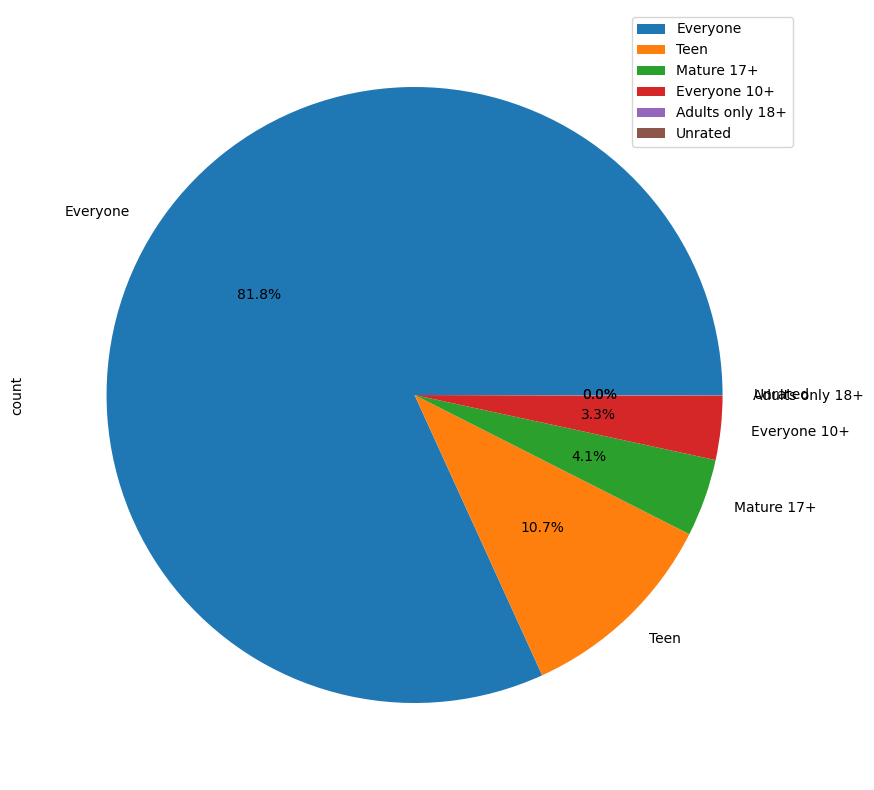

In [182]:
# Content rating of the apps

ps_df['Content Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

A majority of the apps (81.8%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

**4. Number of apps present in each category.**

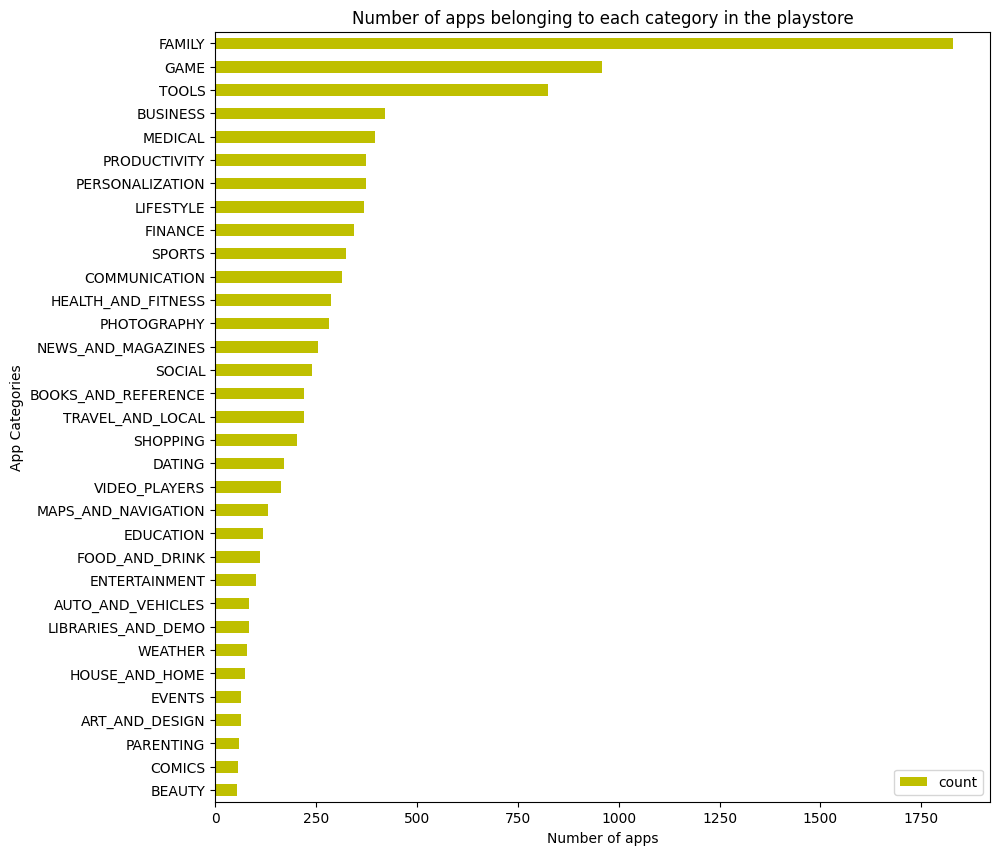

In [183]:
# No of apps in each category

ps_df['Category'].value_counts().plot.barh(figsize=(10,10), color = 'y').invert_yaxis()
plt.ylabel('App Categories')
plt.xlabel('Number of apps')
plt.title('Number of apps belonging to each category in the playstore')
plt.legend()

This visualization tells us how competitive a particular category is in the app store. `Family`, `Game`, and `Tools` category have the maximum number of apps compared to other categories.

**5. Total app installs in each category**

Text(0.5, 1.0, 'Total app installs in each category')

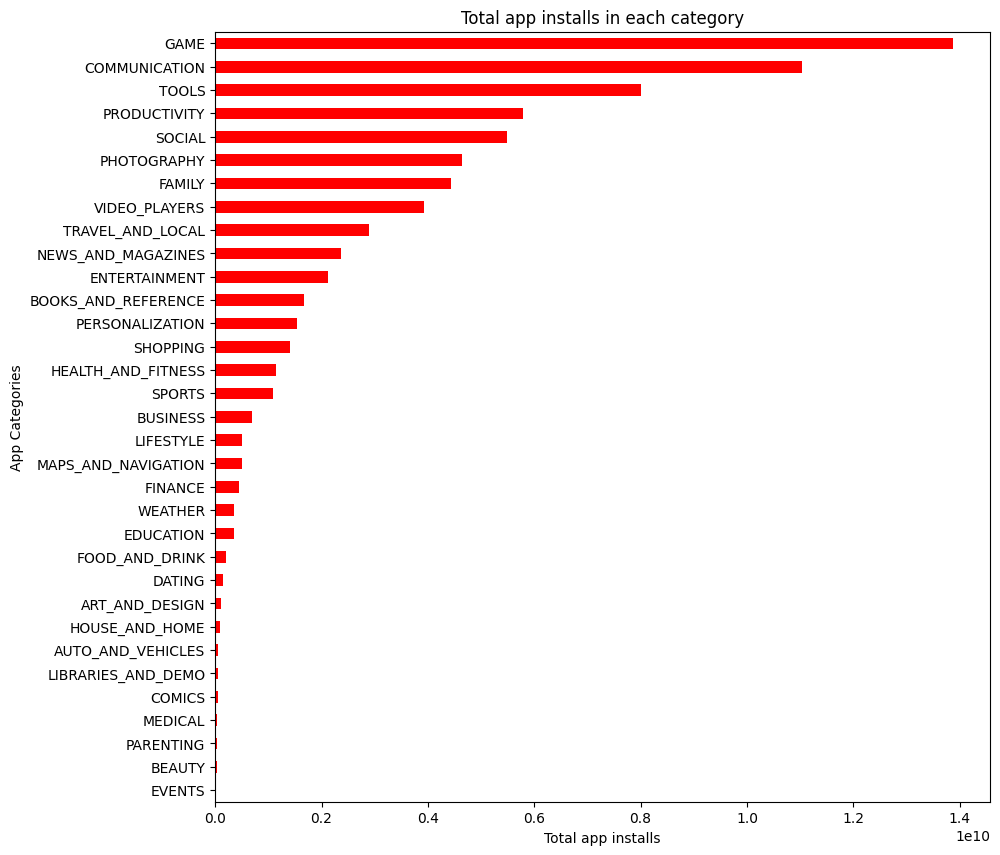

In [184]:
# total app installs in each category of the play store

a = ps_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(10,10), color = 'r')
plt.xlabel('Total app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')

This tells us the category of apps that has the maximum number of installs. The `Game`, `Communication` and `Tools` categories has the highest number of installs compared to other categories of apps.

**6. Average number of app installs in each category**

Text(0.5, 1.0, 'Average number of app installs in each category')

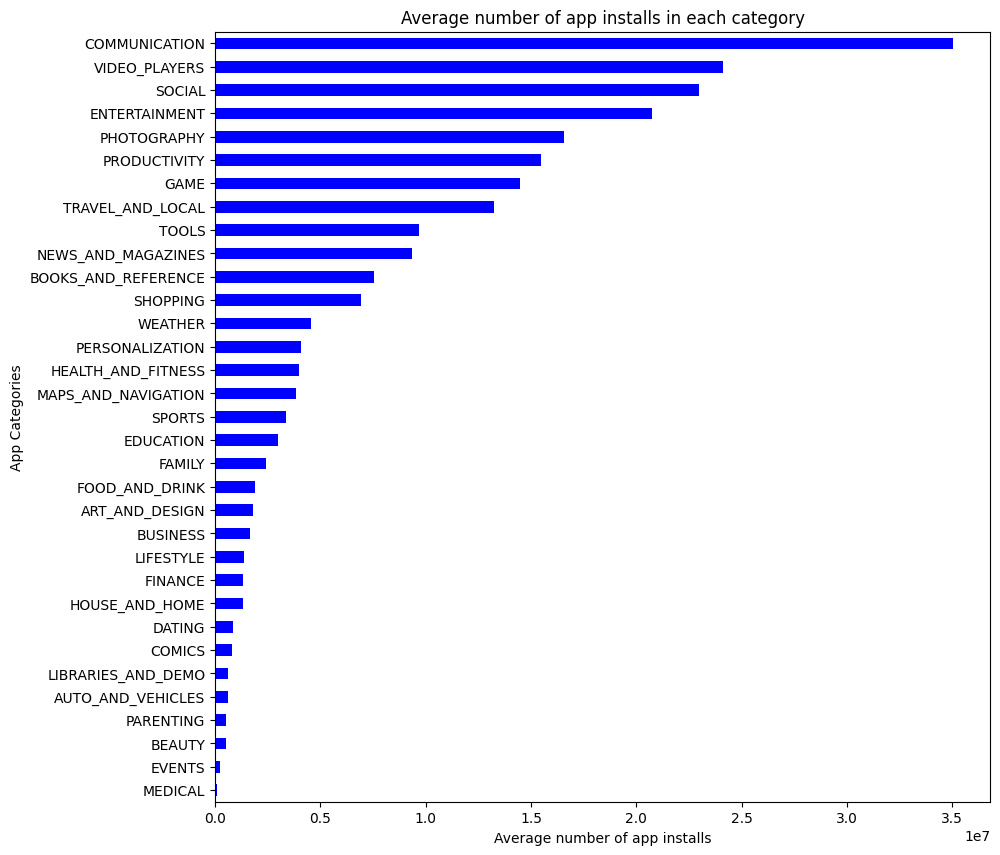

In [185]:
# Average no of app installs in each category of the play store

a = ps_df.groupby(['Category'])['Installs'].mean().sort_values()
a.plot.barh(figsize=(10,10), color = 'b')
plt.xlabel('Average number of app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Average number of app installs in each category')

This visualization gives the average number of installs an app has in each category. The apps in the `Communication`, `Video players` and `Social` categories has the highest number of average installs compared to the apps in other categories.

**7. Average rating of the apps**

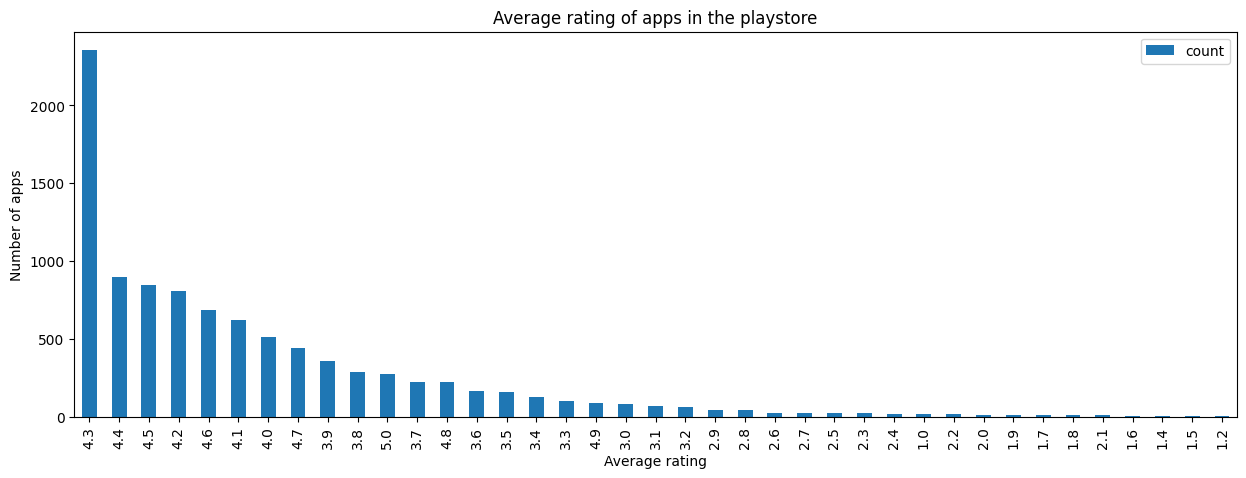

In [186]:
# Average app ratings

ps_df['Rating'].value_counts().plot.bar(figsize=(15,5) )
plt.xlabel('Average rating')
plt.ylabel('Number of apps')
plt.title('Average rating of apps in the playstore')
plt.legend()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

Lets create a new column `Rating group` in the main dataframe and apply these filters.

In [187]:
# Defining a function grouped_rating to group the ratings as mentioned above

def grouped_rating(val):
  '''
  This function categorizes the ratings between 1 and 5 among
  top rated, above average, average, and below average.
  '''
  if val>=4:
    return 'Top Rated'
  elif val>=3 and val<4:
    return 'Above Average'
  elif val>=2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

Lets apply the `grouped_rating` function on the Rating column and save the output in new column named as `Rating group` in the main df.

In [188]:
# Applying grouped_rating function

ps_df['Rating Group'] = ps_df['Rating'].apply(lambda x: grouped_rating(x))

In [189]:
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating   
0      159  19.0     10000  Free    0.0       Everyone  \
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver   
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  \
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

    Rating Group  
0      Top Rated  
1  Above Average  
2      Top Rated  
3      Top Rated  
4      Top Rated

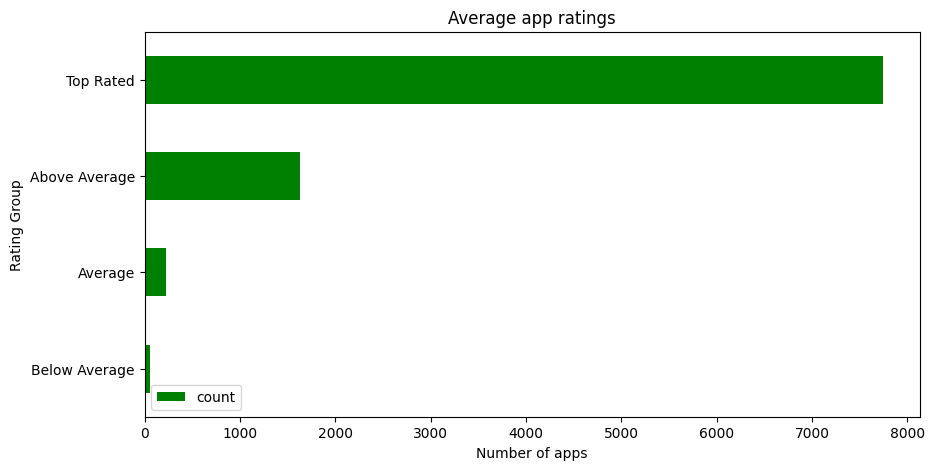

In [190]:
# Average app ratings

ps_df['Rating Group'].value_counts().plot.barh(figsize=(10,5), color = 'g').invert_yaxis()
plt.ylabel('Rating Group')
plt.xlabel('Number of apps')
plt.title('Average app ratings')
plt.xticks(rotation=0)
plt.legend()

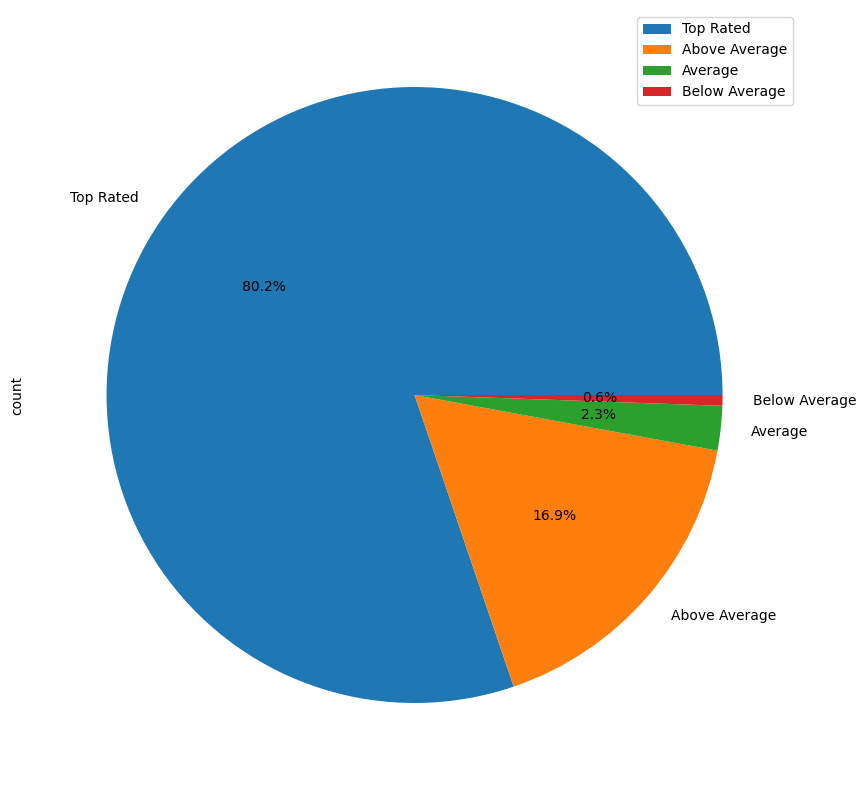

In [191]:
# App rating

ps_df['Rating Group'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

The majority of the apps in the app store are Top rated.

**8. Top apps that are of free type.**

In [222]:
 # Creating a df for only free apps

free_df = ps_df[ps_df['Type'] == 'Free']

In [193]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top_free_df

App             Category  Rating   
152                          Google Play Books  BOOKS_AND_REFERENCE     3.9  \
335   Messenger ‚Äì Text and Video Chat for Free        COMMUNICATION     4.0   
336                         WhatsApp Messenger        COMMUNICATION     4.4   
338               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
340                                      Gmail        COMMUNICATION     4.3   
341                                   Hangouts        COMMUNICATION     4.0   
391              Skype - free IM & video calls        COMMUNICATION     4.1   
865                          Google Play Games        ENTERTAINMENT     4.3   
1654                            Subway Surfers                 GAME     4.5   
2544                                  Facebook               SOCIAL     4.1   
2545                                 Instagram               SOCIAL     4.5   
2554                                   Google+               SOCIAL     4.2   
2808                             Google Photos          PHOTOGRAPHY     4.5   
3117                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3127                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3234                                    Google                TOOLS     4.4   
3454                              Google Drive         PRODUCTIVITY     4.4   
3665                                   YouTube        VIDEO_PLAYERS     4.3   
3687                   Google Play Movies & TV        VIDEO_PLAYERS     3.7   
3736                               Google News   NEWS_AND_MAGAZINES     3.9   

       Reviews                Size    Installs  Type  Price Content Rating   
152    1433233  Varies with device  1000000000  Free    0.0           Teen  \
335   56642847  Varies with device  1000000000  Free    0.0       Everyone   
336   69119316  Varies with device  1000000000  Free    0.0       Everyone   
338    9642995  Varies with device  1000000000  Free    0.0       Everyone   
340    4604324  Varies with device  1000000000  Free    0.0       Everyone   
341    3419249  Varies with device  1000000000  Free    0.0       Everyone   
391   10484169  Varies with device  1000000000  Free    0.0       Everyone   
865    7165362  Varies with device  1000000000  Free    0.0           Teen   
1654  27722264                76.0  1000000000  Free    0.0   Everyone 10+   
2544  78158306  Varies with device  1000000000  Free    0.0           Teen   
2545  66577313  Varies with device  1000000000  Free    0.0           Teen   
2554   4831125  Varies with device  1000000000  Free    0.0           Teen   
2808  10858556  Varies with device  1000000000  Free    0.0       Everyone   
3117   9235155  Varies with device  1000000000  Free    0.0       Everyone   
3127   2129689  Varies with device  1000000000  Free    0.0       Everyone   
3234   8033493  Varies with device  1000000000  Free    0.0       Everyone   
3454   2731171  Varies with device  1000000000  Free    0.0       Everyone   
3665  25655305  Varies with device  1000000000  Free    0.0           Teen   
3687    906384  Varies with device  1000000000  Free    0.0           Teen   
3736    877635                13.0  1000000000  Free    0.0           Teen   

                       Genres Last Updated         Current Ver   
152         Books & Reference   2018-08-03  Varies with device  \
335             Communication   2018-08-01  Varies with device   
336             Communication   2018-08-03  Varies with device   
338             Communication   2018-08-01  Varies with device   
340             Communication   2018-08-02  Varies with device   
341             Communication   2018-07-21  Varies with device   
391             Communication   2018-08-03  Varies with device   
865             Entertainment   2018-07-16  Varies with device   
1654                   Arcade   2018-07-12              1.90.0   
2544                   Social   2018-08-03  Varies with device   
2545            

In [194]:
top_free_df.shape

(20, 14)

In [195]:
# Top free apps

top_free_df['App']

152                            Google Play Books
335     Messenger ‚Äì Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: 

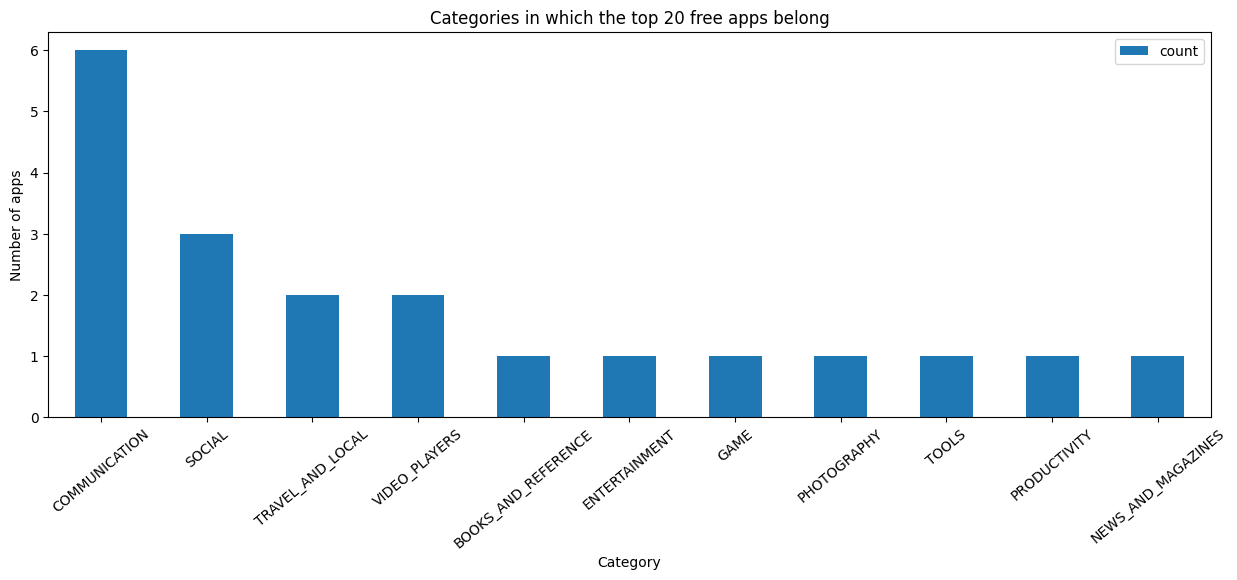

In [196]:
# Categories in which the top 20 free apps belong to

top_free_df['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Categories in which the top 20 free apps belong')
plt.xticks(rotation=40)
plt.legend()

**9. Top apps that are of paid type.**

In [197]:
# Creating a df containing only paid apps

paid_df = ps_df[ps_df['Type'] == 'Paid']
paid_df.head()

App       Category  Rating   
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7  \
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

     Reviews                Size  Installs  Type  Price Content Rating   
234    11442                 6.8    100000  Paid   4.99       Everyone  \
235    10295                39.0    100000  Paid   4.99       Everyone   
427    18247  Varies with device    100000  Paid   3.99       Everyone   
476     1545  Varies with device     10000  Paid   3.99     Mature 17+   
477       57                 6.2      1000  Paid   6.99       Everyone   

            Genres Last Updated  Current Ver Android Ver Rating Group  
234       Business   2018-03-25        1.5.2  4.0 and up    Top Rated  
235       Business   2017-04-11        3.4.6  3.0 and up    Top Rated  
427  Communication   2018-07-05  7.5.3.20547  4.1 and up    Top Rated  
476         Dating   2018-06-19      2.6.139  4.1 and up    Top Rated  
477         Dating   2017-10-25        1.1.6  4.0 and up      Average

<Axes: xlabel='Price'>

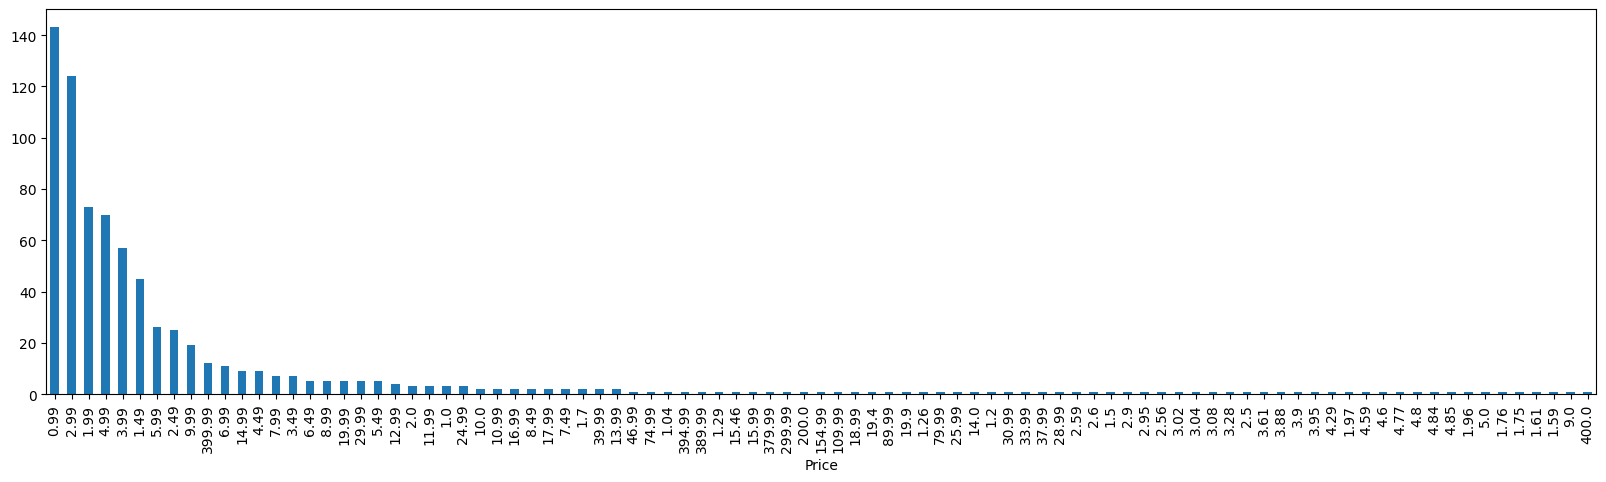

In [198]:
# Number of apps that can be installed at a particular price

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,5))

<Axes: xlabel='Price'>

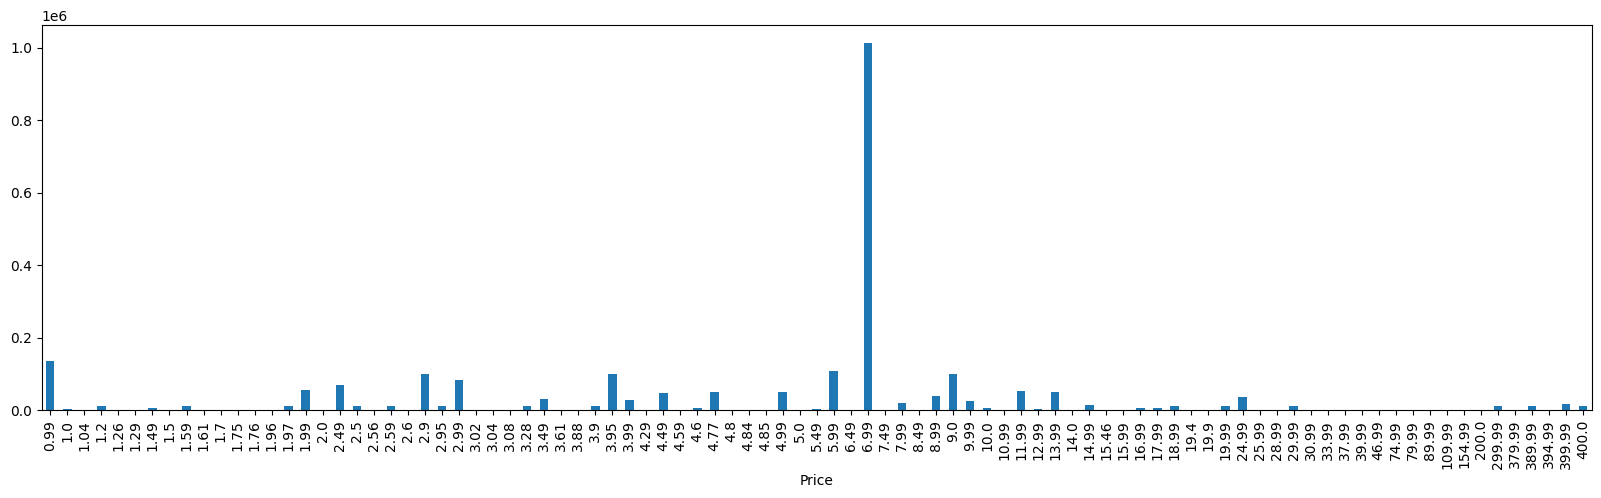

In [199]:
# Average number of paid app installs

paid_df.groupby('Price')['Installs'].mean().plot.bar(figsize=(20,5))

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

 Revenue generated through installs = (Number of installs)x(Price to install the app)


Lets define a new column `Revenue` in paid_df which gives the revenue generated by the app through installs alone.

In [200]:
# Creatng a new column 'Revenue' in paid_df

paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

C:\Users\shubh\AppData\Local\Temp\ipykernel_17376\567900905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']


App       Category  Rating   
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7  \
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

     Reviews                Size  Installs  Type  Price Content Rating   
234    11442                 6.8    100000  Paid   4.99       Everyone  \
235    10295                39.0    100000  Paid   4.99       Everyone   
427    18247  Varies with device    100000  Paid   3.99       Everyone   
476     1545  Varies with device     10000  Paid   3.99     Mature 17+   
477       57                 6.2      1000  Paid   6.99       Everyone   

            Genres Last Updated  Current Ver Android Ver Rating Group   
234       Business   2018-03-25        1.5.2  4.0 and up    Top Rated  \
235       Business   2017-04-11        3.4.6  3.0 and up    Top Rated   
427  Communication   2018-07-05  7.5.3.20547  4.1 and up    Top Rated   
476         Dating   2018-06-19      2.6.139  4.1 and up    Top Rated   
477         Dating   2017-10-25        1.1.6  4.0 and up      Average   

      Revenue  
234  499000.0  
235  499000.0  
427  399000.0  
476   39900.0  
477    6990.0

In [201]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

App Category  Rating  Reviews                Size  Installs  Type   
2241  Minecraft   FAMILY     4.5  2376564  Varies with device  10000000  Paid  \

      Price Content Rating                     Genres Last Updated   
2241   6.99   Everyone 10+  Arcade;Action & Adventure   2018-07-24  \

     Current Ver         Android Ver Rating Group     Revenue  
2241     1.5.2.1  Varies with device    Top Rated  69900000.0

In [202]:
# Top 20 paid apps in the play store

top_paid_df = paid_df.nlargest(20, 'Revenue')
top_paid_df['App']

2241                                           Minecraft
5351                                           I am rich
5356                                   I Am Rich Premium
4034                                       Hitman Sniper
7417                       Grand Theft Auto: San Andreas
2883                                 Facetune - For Free
5578                             Sleep as Android Unlock
8804                                 DraStic DS Emulator
4367                            I'm Rich - Trump Edition
4362                                          üíé I'm rich
5354                                      I am Rich Plus
5366                                           I Am Rich
5355                                       I am rich VIP
4133                                        Weather Live
2242                          Card Wars - Adventure Time
5631                             Five Nights at Freddy's
7355                                             Threema
8860                        

In [203]:
top_paid_df.shape

(20, 15)

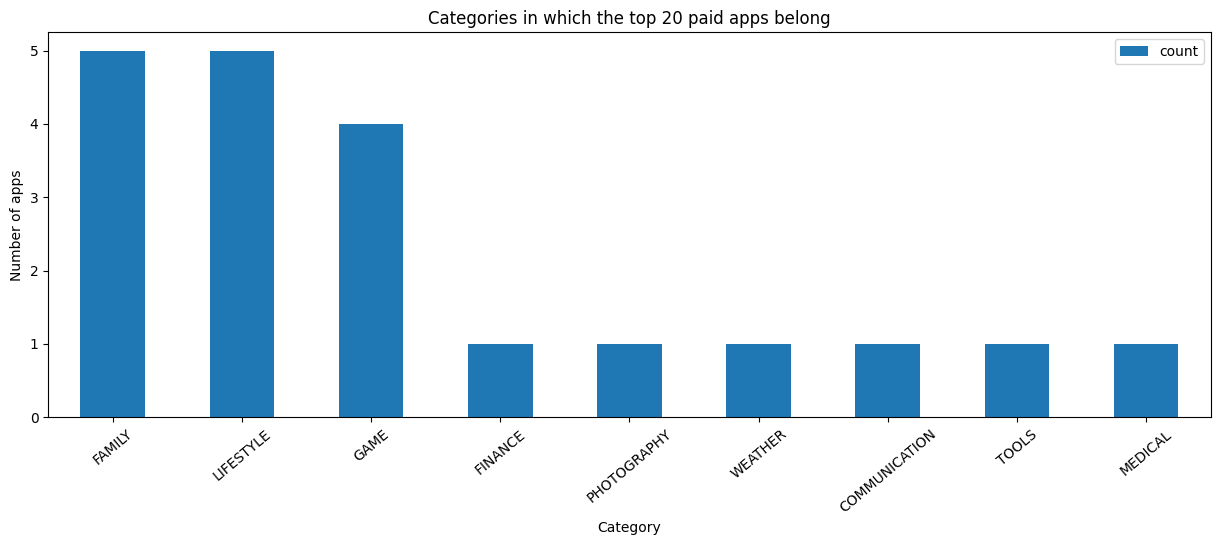

In [204]:
# Categories in which the top 20 paid apps belong to

top_paid_df['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Categories in which the top 20 paid apps belong')
plt.xticks(rotation=40)
plt.legend()

C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


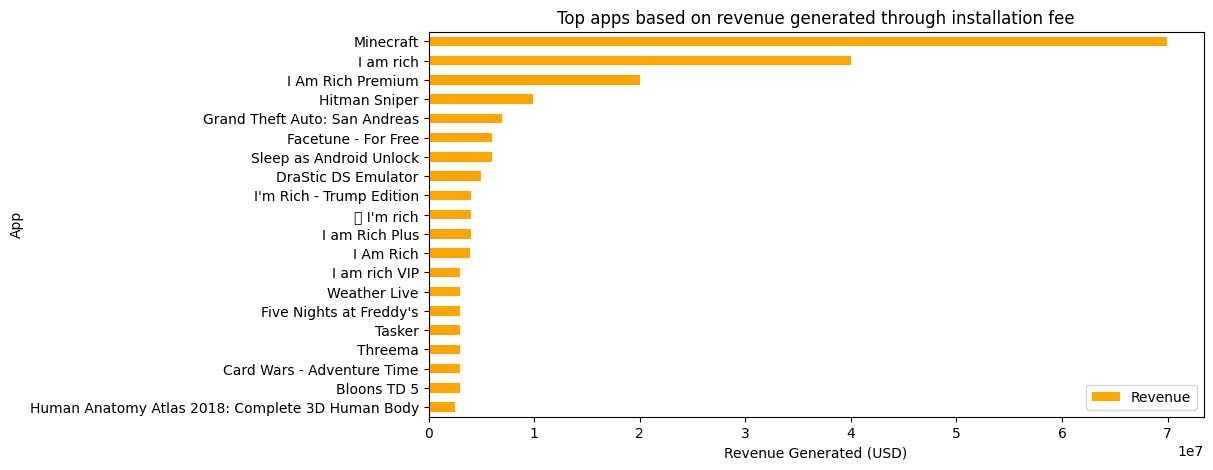

In [205]:
# Top paid apps according to the revenue generated through installs alone

top_paid_df.groupby('App')['Revenue'].mean().sort_values().plot.barh(figsize=(10,5), color = 'orange')
plt.xlabel('Revenue Generated (USD)')
plt.title('Top apps based on revenue generated through installation fee')
plt.legend()

In [206]:
# Paid apps with the highest number of installs

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

App Category  Rating  Reviews                Size  Installs  Type   
2241  Minecraft   FAMILY     4.5  2376564  Varies with device  10000000  Paid  \

      Price Content Rating                     Genres Last Updated   
2241   6.99   Everyone 10+  Arcade;Action & Adventure   2018-07-24  \

     Current Ver         Android Ver Rating Group     Revenue  
2241     1.5.2.1  Varies with device    Top Rated  69900000.0

There is only one paid app with more than 10M+ installs.

**10. Average price of paid apps in each category**

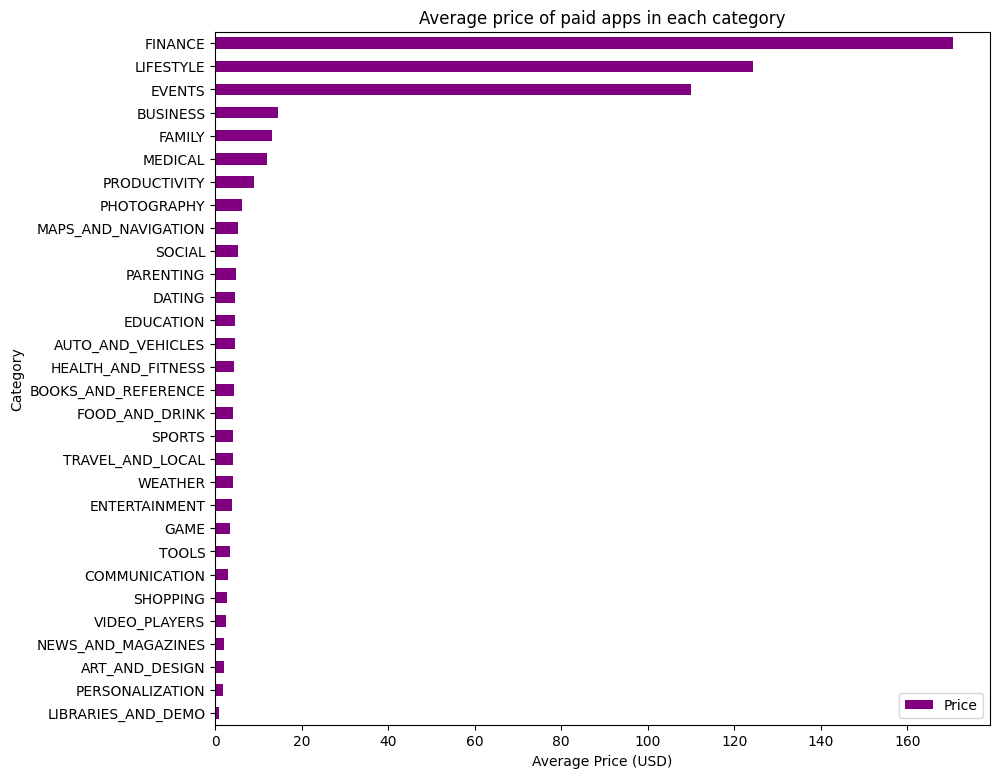

In [207]:
# Average price of paid apps in each category

paid_df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (10,9), color='purple').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average price of paid apps in each category')
plt.legend()

**11. Top 20 apps with the highest number of user reviews**

Text(0.5, 1.0, 'Top 20 apps with the highest number of user reviews')

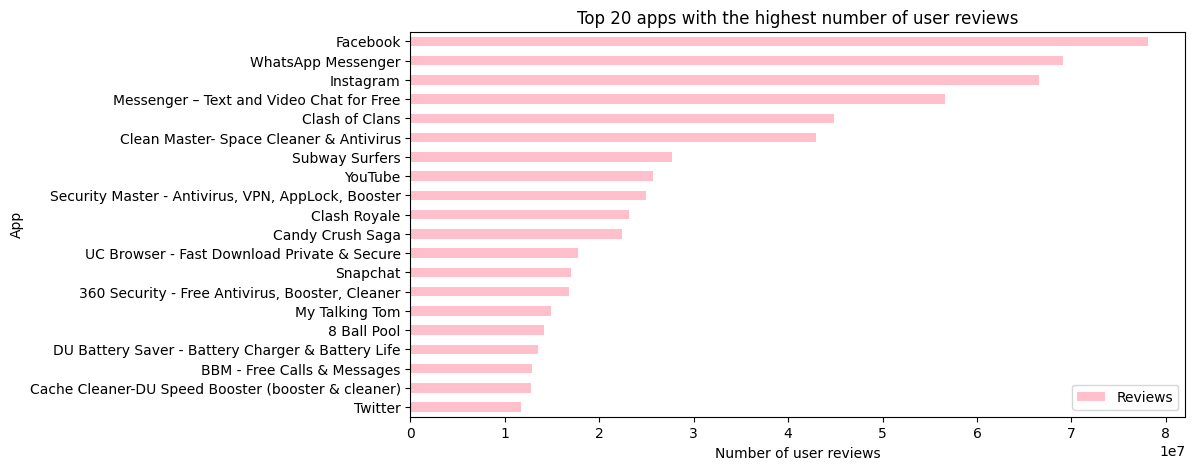

In [208]:
# Top apps with the highest number of user reviews

ps_df.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,5), color = 'pink').invert_yaxis()
plt.xlabel('Number of user reviews')
plt.title('Top 20 apps with the highest number of user reviews')

We can say that the apps with the highest number of user reviews are the most popular apps in the play store.

**12. Distribution of apps based on its size**

In [209]:
# Values calculated earlier

max_size,min_size,mean_size,median_size

(100.0, 0.0083, 20.4136, 12.0)

* The size of an app in our database varies from 100 MB to 0.0083 MB. We can analyse the size of the apps if we can group them into certain intervals.
* We have already established that the data in the numeric values in the 'Size' column are skewed towards the left.
* Lets group the data in the size column as follows into intervals of 10 each:

(< 1 MB, 1-10, 10-20, 20-30, ..., 90-100, 'Varies with device')

Lets create a function to create the size intervals

In [210]:
# Function to group the apps based on its size in MB

def size_group(var):
  '''
  This function groups the size of an app
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

Lets apply the `size_group` function on the `Size` column and store the results in a new column named `Size group`.

In [211]:
# Applying the size_group function on the main df

ps_df['Size group'] = ps_df['Size'].apply(lambda x: size_group(x))
ps_df.head()

App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating   
0      159  19.0     10000  Free    0.0       Everyone  \
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver   
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  \
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

    Rating Group Size group  
0      Top Rated      10-20  
1  Above Average      10-20  
2      Top Rated       1-10  
3      Top Rated      20-30  
4      Top Rated       1-10

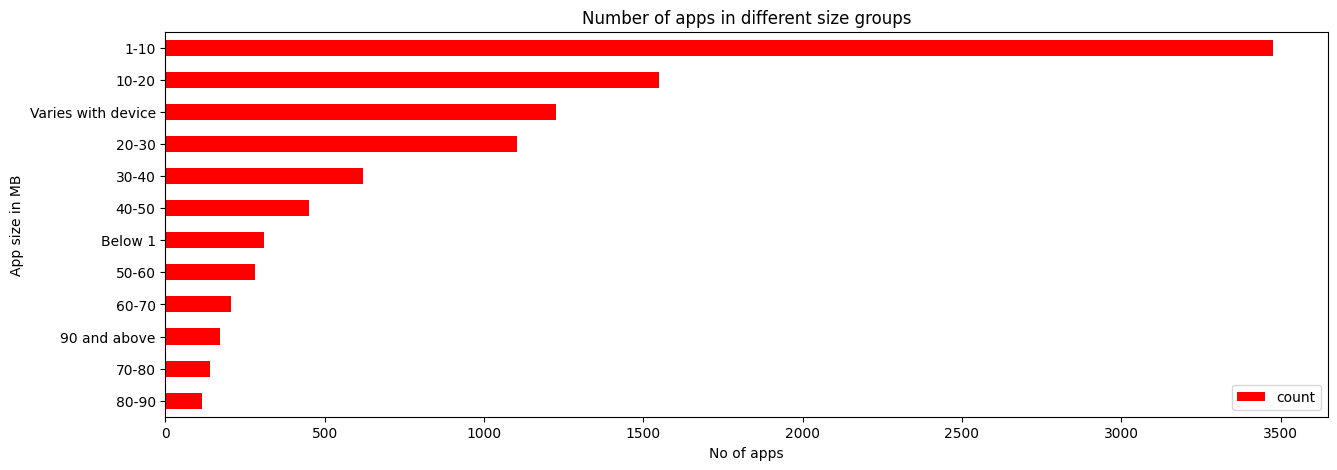

In [212]:
# no of apps belonging to each size group

ps_df['Size group'].value_counts().plot.barh(figsize=(15,5), color='red').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()

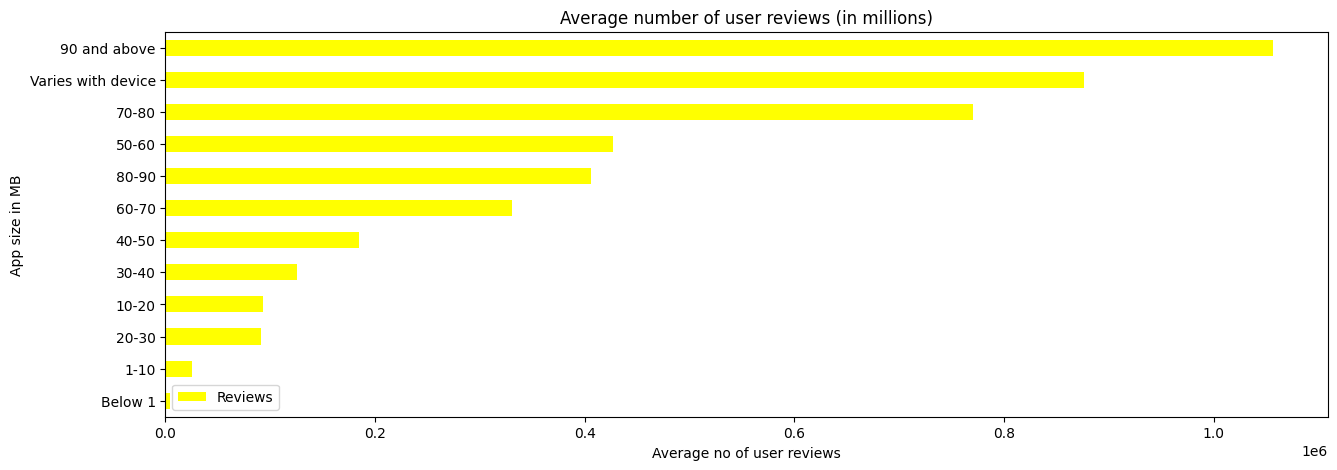

In [213]:
# Average no of user reviews in each size group

ps_df.groupby('Size group')['Reviews'].mean().sort_values().plot.barh(figsize=(15,5), color = 'yellow')
plt.title("Average number of user reviews (in millions)")
plt.xlabel('Average no of user reviews')
plt.ylabel('App size in MB')
plt.legend()

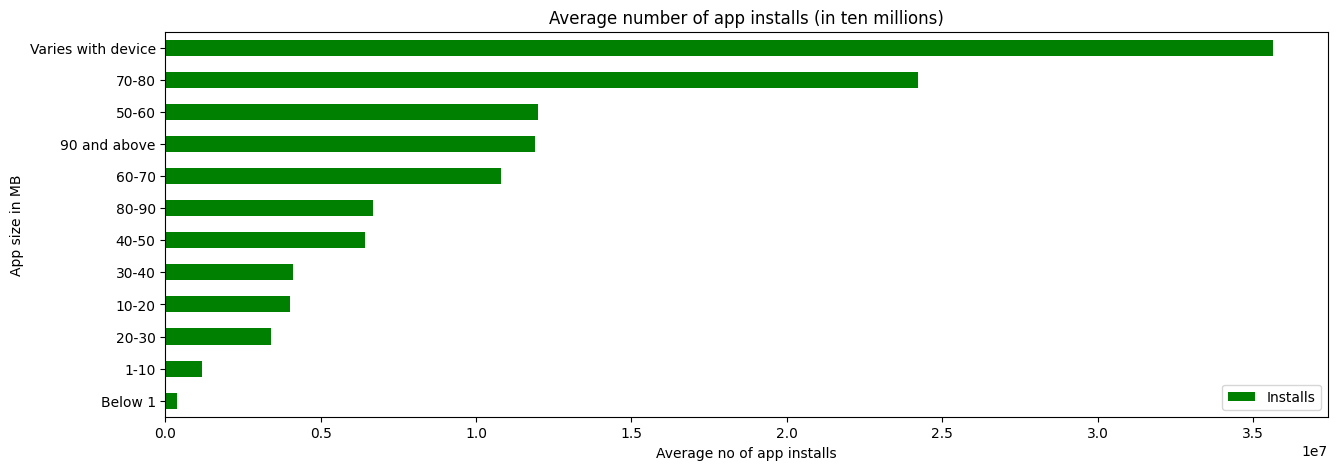

In [214]:
# average number of app installs in each category

ps_df.groupby('Size group')['Installs'].mean().sort_values().plot.barh(figsize=(15,5), color='green')
plt.title("Average number of app installs (in ten millions)")
plt.xlabel('Average no of app installs')
plt.ylabel('App size in MB')
plt.legend()

* The sizes of the majority of the apps range in between 1 and 20 MB.
* There are a good number of apps whose size varies with the device.
* The apps which are smaller in size on average have lower no of app installs and user reviews.

# **Data visualization on User reviews:**

In [215]:
# Basic inspection

ur_df.head()

App                                  Translated_Review   
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...  \
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

In [216]:
# Review sentiment for each app

ur_df.groupby('App')['Sentiment'].value_counts()

App                               Sentiment
10 Best Foods for You             Positive     162
                                  Neutral       22
                                  Negative      10
104 ÊâæÂ∑•‰Ωú - ÊâæÂ∑•‰Ωú ÊâæÊâìÂ∑• ÊâæÂÖºËÅ∑ Â±•Ê≠∑ÂÅ•Ê™¢ Â±•Ê≠∑Ë®∫ÁôÇÂÆ§  Positive      31
                                  Neutral        8
                                              ... 
Hotwire Hotel & Car Rental App    Neutral       11
                                  Negative       6
Housing-Real Estate & Property    Negative      10
                                  Positive       8
                                  Neutral        3
Name: count, Length: 2376, dtype: int64

**1. Apps with the highest number of positive reviews**

In [217]:
# positive reviews

positive_reviews_df = ur_df[ur_df['Sentiment'] == 'Positive']
positive_reviews_df

App   
0               10 Best Foods for You  \
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64217  Housing-Real Estate & Property   
64221  Housing-Real Estate & Property   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   

                                       Translated_Review Sentiment   
0      I like eat delicious food. That's I'm cooking ...  Positive  \
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64217  I able set range 1cr, scroll space 0-1cr range...  Positive   
64221  Everything old stuff neither clear sold proper...  Positive   
64222  Most ads older many agents ..not much owner po...  Positive   
64223  If photos posted portal load, fit purpose. I'm...  Positive   
64227  I property business got link SMS happy perform...  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
3                0.400000                0.875000  
4                1.000000                0.300000  
5                1.000000                0.300000  
...                   ...                     ...  
64217            0.233333                0.550000  
64221            0.021591                0.259470  
64222            0.173333                0.486667  
64223            0.225000                0.447222  
64227            0.800000                1.000000  

[23998 rows x 5 columns]

Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

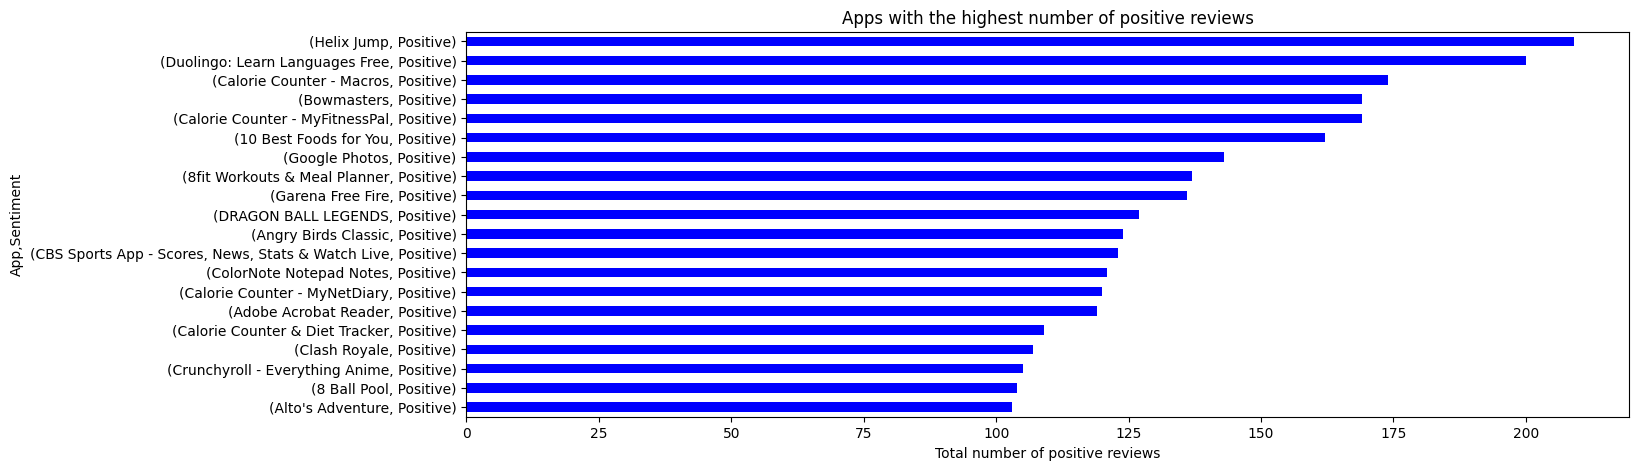

In [218]:
positive_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='blue').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

**2. Apps with the highest number of negative reviews**

In [219]:
# negative reviews

negative_reviews_df = ur_df[ur_df['Sentiment'] == 'Negative']
negative_reviews_df

App   
32              10 Best Foods for You  \
43              10 Best Foods for You   
68              10 Best Foods for You   
85              10 Best Foods for You   
95              10 Best Foods for You   
...                               ...   
64215  Housing-Real Estate & Property   
64216  Housing-Real Estate & Property   
64220  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment   
32                    No recipe book Unable recipe book.  Negative  \
43     Waste time It needs internet time n ask calls ...  Negative   
68                               Faltu plz waste ur time  Negative   
85                                     Crap Doesn't work  Negative   
95     Boring. I thought actually just texts that's i...  Negative   
...                                                  ...       ...   
64215  Horrible app. I wanted list property get aroun...  Negative   
64216  Worst app. We get nothing Time waste . They up...  Negative   
64220  No response support team. After I login, unabl...  Negative   
64226  Dumb app, I wanted post property rent give opt...  Negative   
64230  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
32              -0.500000                0.500000  
43              -0.200000                0.000000  
68              -0.200000                0.000000  
85              -0.800000                0.800000  
95              -0.325000                0.475000  
...                   ...                     ...  
64215           -0.528571                0.717262  
64216           -0.400000                0.250000  
64220           -0.377778                0.533333  
64226           -0.287500                0.250000  
64230           -0.316667                0.400000  

[8271 rows x 5 columns]

Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

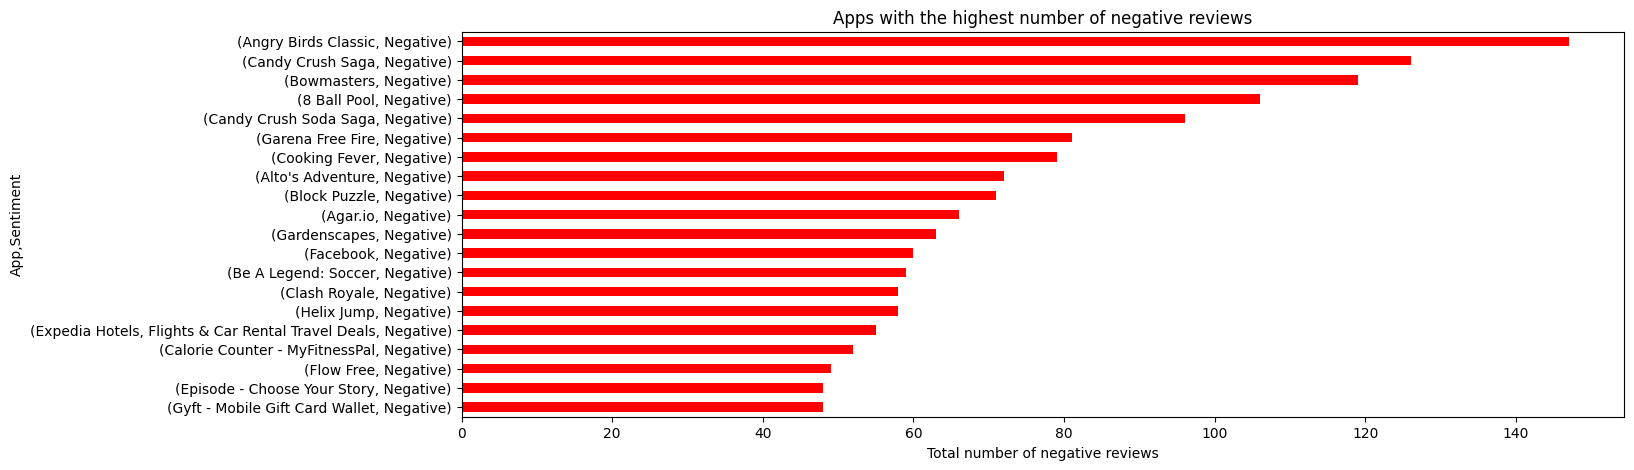

In [220]:
negative_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='r').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

**3. Wordcloud on all the positive reviews in the dataset**

* The word clouds can be used to get a visual representation of any textual data, in this case the user reviews.
* The higher the number of times a particular word is repeated, the bigger and bolder it gets. The words which are not repeated as much have a smaller text height and are not in bold.
* Hence the word clouds can be used to get a birds eye view of all the textual data in the dataset.
* In this case it can be created for all the reviews in the dataset or for the positive and negative reviews seperately. Also, it can be created for the user reviews for each app seperately.
* Let us create a word cloud for the positive, negative, and all the reviews in the dataset.

In [224]:
pip install wordcloud



                                              0.0/300.2 kB ? eta -:--:--
     -----                                 41.0/300.2 kB 960.0 kB/s eta 0:00:01
     -------                               61.4/300.2 kB 648.1 kB/s eta 0:00:01
     -------------                        112.6/300.2 kB 819.2 kB/s eta 0:00:01
     ------------------------               194.6/300.2 kB 1.2 MB/s eta 0:00:01
     -------------------------              204.8/300.2 kB 1.1 MB/s eta 0:00:01
     -----------------------------------    276.5/300.2 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [225]:
# importing the required libraries

from wordcloud import WordCloud, STOPWORDS

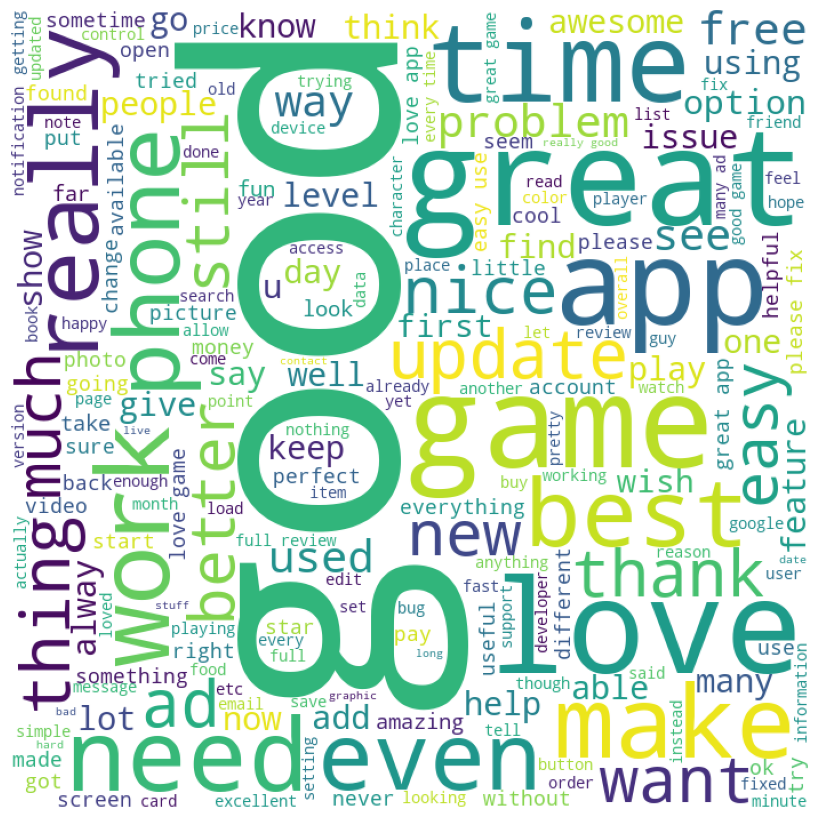

In [226]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in positive_reviews_df.Translated_Review.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

From the word cloud generated, we can say that some of the most common words used by the users while writing a positive review for an app are 'great', 'love', 'good', 'time', and 'game'.

**4. Wordcloud on all the negative reviews in the dataset**

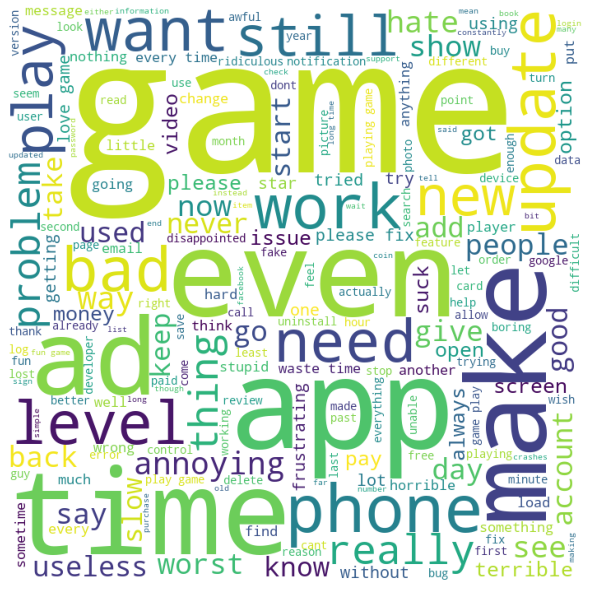

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in negative_reviews_df.Translated_Review.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

From the word cloud generated, we can say that some of the most common words used by the users while writing a negative review for an app are 'time', 'make', 'game', 'app', 'even', 'bad', 'ad' and 'phone'.

**5. Wordcloud on all the reviews in the dataset**

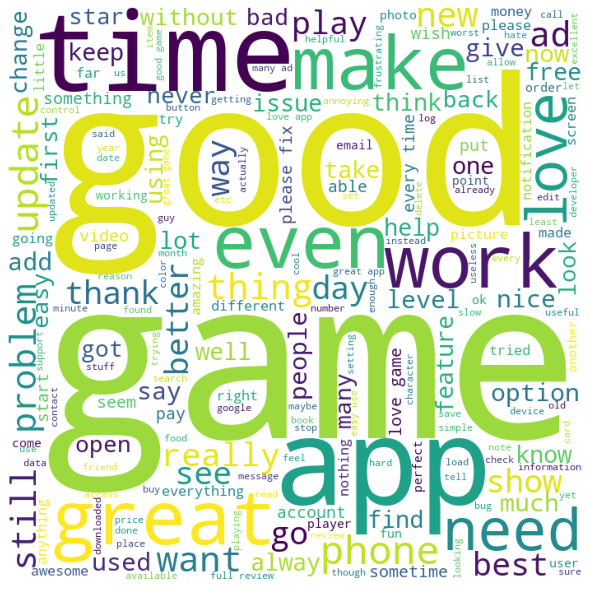

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in ur_df.Translated_Review.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

From the word cloud generated, we can say that some of the most common words used by the users while writing a review for an app are 'time', 'good', 'game', 'app', 'great', 'love', 'work', 'phone', etc.

# **Analysis Summary:**

* Percentage of free apps = ~92%
* Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest number of installs: Game
* Category with the highest average app installs: Communicaction
* Percentage of apps that are top rated = ~80%
* There are 20 free apps that have been installed over a billion times
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Category in which the paid apps have the highest average installation fee: Finance
* Most popular app in the Play Store based on the number of reviews: Facebook
* The median size of all apps in the play store is 12 MB.
* The apps whose size varies with device has the highest number average app installs.
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.

# **Conclusion:**

From this EDA project, the following concepts were learnt:
* Basic inspection of the raw data.
* Examining the business KPIs for app development and devising a solution to the problem.
* Handing the duplicate, error and NaN values present in the dataset, ie, cleaning the data.
* Using different Python functions and libraries to clean and manipulate data.
* Data wrangling to come up with different insights on the data.
* Designing multiple visualizations to summarize the information in the dataset and successfully communicate the results and trends to the reader.

Different Python libraries used to complete this EDA:
* Pandas
* NumPy
* DateTime
* Matplotlib.Pyplot
* Seaborn
* Wordcloud
* Stopwords
